Deep Learning with TensorFlow

Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


Load and Preprocess the MNIST Dataset

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add a channel dimension: (28, 28) → (28, 28, 1)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Check shape
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


Build the CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()  # Show model architecture


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9002 - loss: 0.3159 - val_accuracy: 0.9841 - val_loss: 0.0473
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9861 - loss: 0.0448 - val_accuracy: 0.9859 - val_loss: 0.0442
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.9876 - val_loss: 0.0366
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9897 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9890 - val_loss: 0.0318


Training Accuracy: 99.50%
Validation/Test Accuracy: 98.90% ← well above the 95% goal
Final Loss: quite low, which means the model generalizes well

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\n✅ Test Accuracy: {:.2f}%".format(test_acc * 100))


313/313 - 3s - 8ms/step - accuracy: 0.9890 - loss: 0.0318

✅ Test Accuracy: 98.90%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


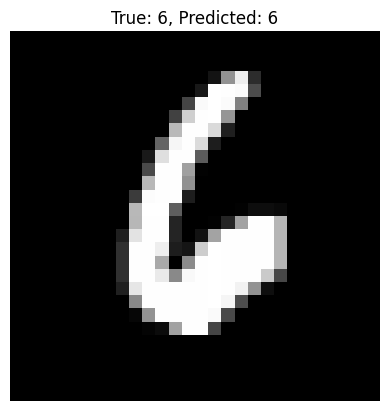

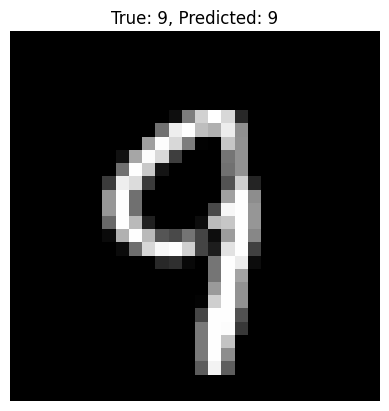

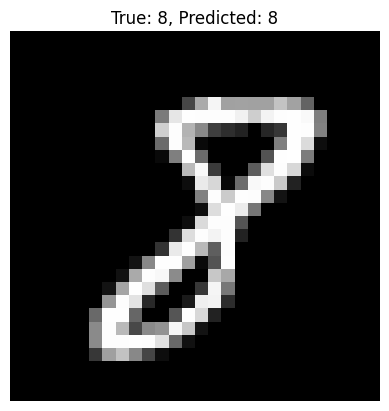

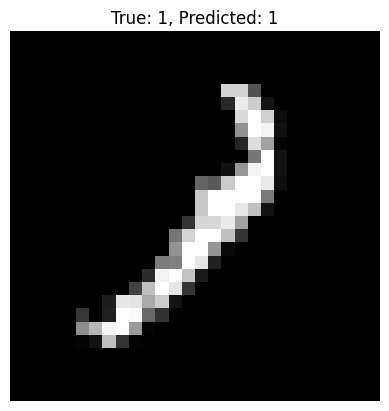

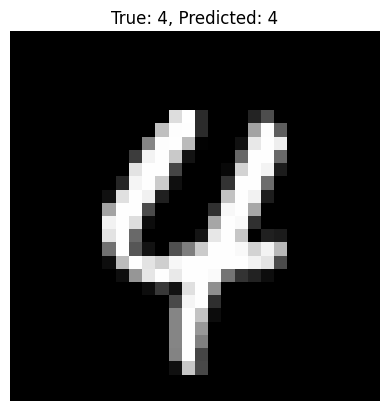

In [7]:
# Pick 5 random test images
num_samples = 5
indices = np.random.choice(len(X_test), num_samples)
images = X_test[indices]
true_labels = y_test[indices]

# Predict
predicted_probs = model.predict(images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Plot results
for i in range(num_samples):
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()


In [9]:
model.save('mnist_model.keras')  # ← recommended modern format

